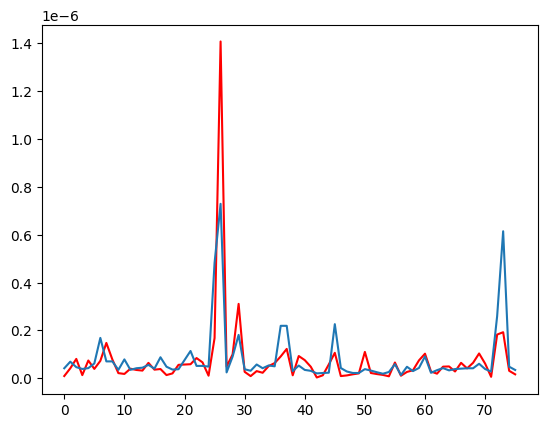

In [3]:
from numpy.fft import fft
from utils import preprocess_data_sample, get_metadata
import numpy as np
from numpy._typing import NDArray
metadata = get_metadata()
import matplotlib.pyplot as plt
x = []
y = [] 
mean = []

for idx in range(len(metadata)):
    try:
        df, target = preprocess_data_sample(idx, metadata)
    except FileNotFoundError:
        continue
    x.append(idx)
    v: NDArray = df['v'].resample('s').mean().values
    fourier = np.abs(fft(v))
    mean.append(fourier.mean())
    y.append(fourier[int(target)])

plt.plot(
    x,
    y,
    color = 'red'
)

plt.plot(
    x,
    mean,
)

plt.show()